In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1. Cluster the IRIS dataset using k-means algorithms (using 3 clusters)


*   Write your own code and do not use the inbuilt functions. 
*   Repeat the experiments for k-means using library functions and verify the earlier results. 



Closest centroids for the first 3 examples:
 [[1.]
 [1.]
 [1.]]
Centroids computed after initial finding of closest centroids:
 [[5.00377358 3.33207547 1.60188679 0.30377358]
 [6.07457627 2.81016949 4.49830508 1.45423729]
 [6.6972973  3.03243243 5.73243243 2.1       ]]


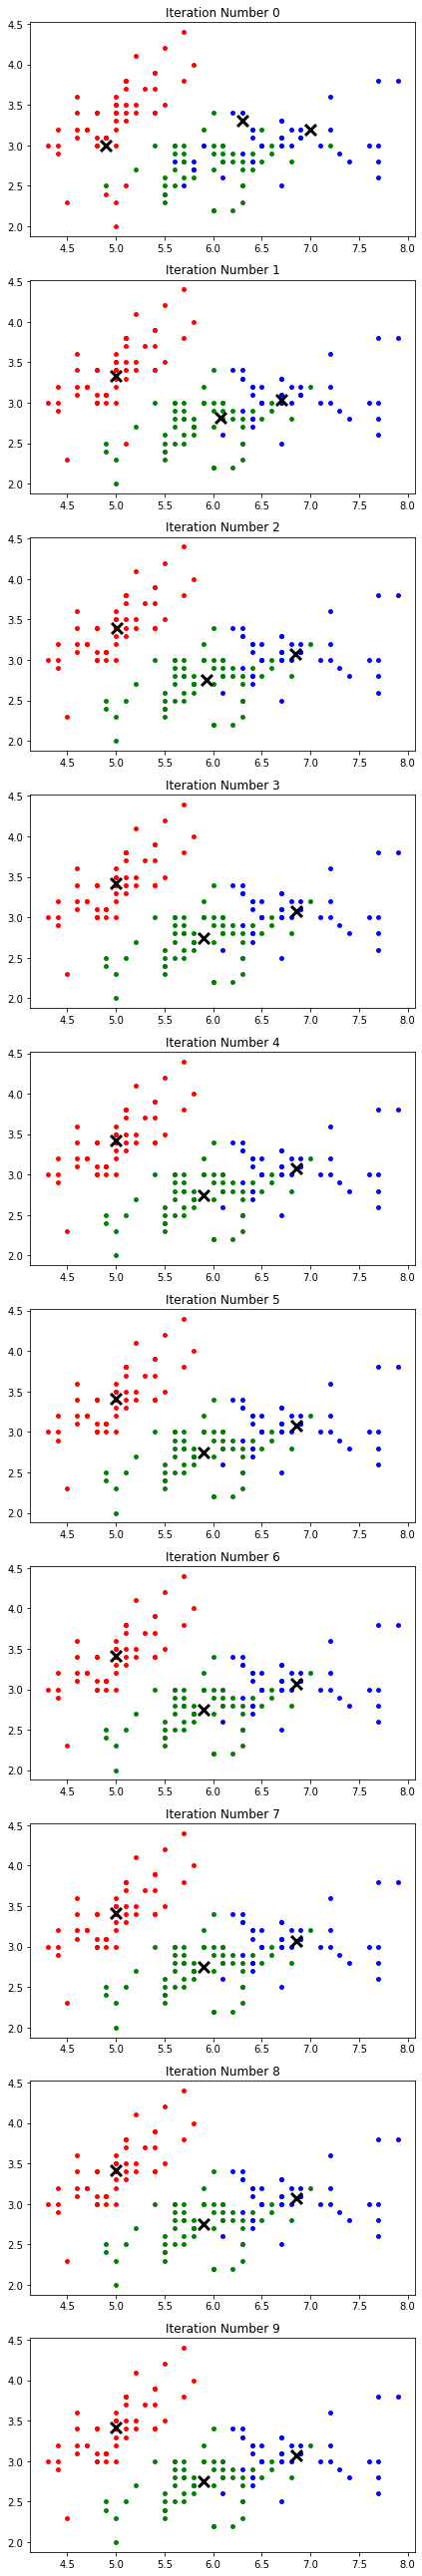

In [ ]:
#Implementation of Kmeans without inbuilt function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets import load_iris
data=pd.read_csv("/content/iris.data")
#iris=load_iris()
#df=data.items()
df=data.values
#d=list(df)
x=np.array(df)
X=np.delete(x,(4), axis = 1)
X=X.astype(np.float)

def findClosestCentroids(X, centroids):
    """
    Returns the closest centroids in idx for a dataset X where each row is a single example.
    """
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1))
    temp = np.zeros((centroids.shape[0],1))
  
    for i in range(X.shape[0]):
        for j in range(K):
            dist = X[i,:] - centroids[j,:]
            length = np.sum(dist**2)
            temp[j] = length
        idx[i] = np.argmin(temp)+1
    return idx
K = 3
initial_centroids = np.array([[4.9, 3 , 1.4 , 0.2 ],[7.0 ,3.2 ,4.7 ,1.4 ],[6.3, 3.3, 6.0, 2.5 ]])
idx = findClosestCentroids(X, initial_centroids)
print("Closest centroids for the first 3 examples:\n",idx[0:3])
def computeCentroids(X, idx, K):
    """
    returns the new centroids by computing the means of the data points assigned to each centroid.
    """
    m, n = X.shape[0],X.shape[1]
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    
    for i in range(m):
        index = int((idx[i]-1)[0])
        centroids[index,:]+=X[i,:]
        count[index]+=1
    
    return centroids/count
centroids = computeCentroids(X, idx, K)
print("Centroids computed after initial finding of closest centroids:\n", centroids)
def plotKmeans(X, centroids, idx, K, num_iters):
    """
    plots the data points with colors assigned to each centroid
    """
    m,n = X.shape[0],X.shape[1]
    
    fig, ax = plt.subplots(nrows=num_iters,ncols=1,figsize=(6,36))
    
    for i in range(num_iters):    
        # Visualisation of data
        color = "rgb"
        for k in range(1,K+1):
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c=color[k-1],s=15)
# visualize the new centroids
        ax[i].scatter(centroids[:,0],centroids[:,1],s=120,marker="x",c="black",linewidth=3)
        title = "Iteration Number " + str(i)
        ax[i].set_title(title)
        
        # Compute the centroids mean
        centroids = computeCentroids(X, idx, K)
        
        # assign each training example to the nearest centroid
        idx = findClosestCentroids(X, centroids)
    
    plt.tight_layout()
m,n = X.shape[0],X.shape[1]
plotKmeans(X, initial_centroids,idx, K,10)



In [ ]:
#Implementation of Kmeans with buitIn function
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
data=pd.read_csv("/content/iris.data")
x=np.array(data)
X=np.delete(x,(4), axis = 1)
X=X.astype(np.float)
kmeans = KMeans(init="random", n_init=10, max_iter=300, random_state=42 )
kmeans.fit(X) 
# Final locations of the centroid
print(kmeans.cluster_centers_)
# The number of iterations required to converge
print(kmeans.n_iter_)


[[5.26153846 3.67692308 1.50769231 0.29230769]
 [5.2        2.36666667 3.38333333 1.01666667]
 [7.475      3.125      6.3        2.05      ]
 [4.71304348 3.12173913 1.4173913  0.19130435]
 [5.62272727 2.70909091 4.11818182 1.28636364]
 [6.56086957 3.06956522 5.52608696 2.15217391]
 [6.03636364 2.70909091 4.90909091 1.69545455]
 [6.52666667 3.04666667 4.6        1.45333333]]
13


2. Implement the dbscan algorithm using the same dataset. 


Set eps  = 5, Minpoints = 5


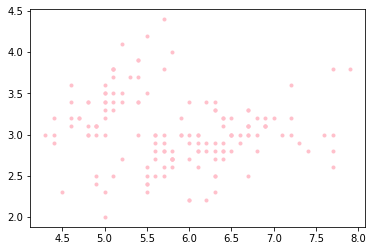

number of cluster found: 1
Counter({1: 149})
numbrer of outliers found: 0

Set eps  = 5, Minpoints = 10


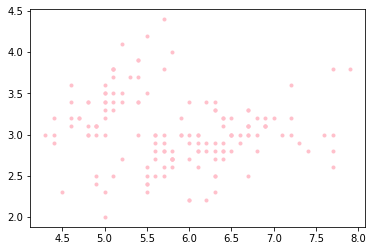

number of cluster found: 1
Counter({1: 149})
numbrer of outliers found: 0

Set eps  = 10, Minpoints = 5


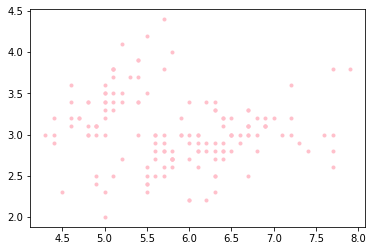

number of cluster found: 1
Counter({1: 149})
numbrer of outliers found: 0

Set eps  = 10, Minpoints = 10


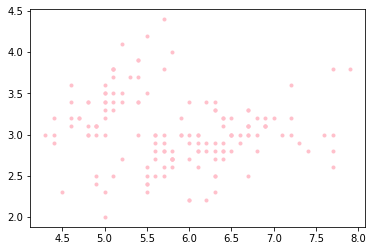

number of cluster found: 1
Counter({1: 149})
numbrer of outliers found: 0



NameError: ignored

In [ ]:
# dbscan algorithm without library function
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import queue
import scipy.io as spio

#Define label for differnt point group
NOISE = 0
UNASSIGNED = 0
core=-1
edge=-2



#function to find all neigbor points in radius
def neighbor_points(data, pointId, radius):
    points = []
    for i in range(len(data)):
        #Euclidian distance using L2 Norm
        if np.linalg.norm(data[i] - data[pointId]) <= radius:
            points.append(i)
    return points

#DB Scan algorithom
def dbscan(data, Eps, MinPt):
    #initilize all pointlable to unassign
    pointlabel  = [UNASSIGNED] * len(data)
    pointcount = []
    #initilize list for core/noncore point
    corepoint=[]
    noncore=[]
    
    #Find all neigbor for all point
    for i in range(len(data)):
        pointcount.append(neighbor_points(train,i,Eps))
    
    #Find all core point, edgepoint and noise
    for i in range(len(pointcount)):
        if (len(pointcount[i])>=MinPt):
            pointlabel[i]=core
            corepoint.append(i)
        else:
            noncore.append(i)

    for i in noncore:
        for j in pointcount[i]:
            if j in corepoint:
                pointlabel[i]=edge

                break
            
    #start assigning point to luster
    cl = 1
    #Using a Queue to put all neigbor core point in queue and find neigboir's neigbor
    for i in range(len(pointlabel)):
        q = queue.Queue()
        if (pointlabel[i] == core):
            pointlabel[i] = cl
            for x in pointcount[i]:
                if(pointlabel[x]==core):
                    q.put(x)
                    pointlabel[x]=cl
                elif(pointlabel[x]==edge):
                    pointlabel[x]=cl
            #Stop when all point in Queue has been checked   
            while not q.empty():
                neighbors = pointcount[q.get()]
                for y in neighbors:
                    if (pointlabel[y]==core):
                        pointlabel[y]=cl
                        q.put(y)
                    if (pointlabel[y]==edge):
                        pointlabel[y]=cl            
            cl=cl+1 #move to next cluster
           
    return pointlabel,cl
    
#Function to plot final result
def plotRes(data, clusterRes, clusterNum):
    nPoints = len(data)
    scatterColors = ['black', 'pink', 'brown', 'blue', 'purple', 'orange', 'yellow']
    for i in range(clusterNum):
        if (i==0):
            #Plot all noise point as blue
            color='blue'
        else:
            color = scatterColors[i % len(scatterColors)]
        x1 = [];  y1 = []
        for j in range(nPoints):
            if clusterRes[j] == i:
                x1.append(data[j, 0])
                y1.append(data[j, 1])
        plt.scatter(x1, y1, c=color, alpha=1, marker='.')


#Load Data
r = pd.read_csv("/content/iris.data")

train = r.values
train=np.delete(train,(4),axis=1)
#Set EPS and Minpoint
epss = [5,10]
minptss = [5,10]
# Find ALl cluster, outliers in different setting and print result
for eps in epss:
    for minpts in minptss:
        print('Set eps  = ' +str(eps)+ ', Minpoints = '+str(minpts))
        pointlabel,cl = dbscan(train,eps,minpts)
        plotRes(train, pointlabel, cl)
        plt.show()
        print('number of cluster found: ' + str(cl-1))
        counter=collections.Counter(pointlabel)
        print(counter)
        outliers  = pointlabel.count(0)
        print('numbrer of outliers found: '+str(outliers) +'\n')
print("ARI =", adjusted_rand_score(train[:,1], clusters))

ARI = 0.0068123892635208105


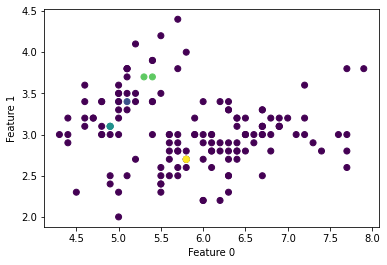

In [ ]:
#dbscan algo with library function
import numpy as np
import pandas as pd
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data=pd.read_csv("/content/iris.data")
#iris=load_iris()
#df=data.items()
df=data.values
#d=list(df)
x=np.array(df)
X=np.delete(x,(4), axis = 1)
X=X.astype(np.float)
X_scaled = scaler.fit_transform(X)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("ARI =", adjusted_rand_score(X[:,1], clusters))
